In [2]:
import numpy as np
import pyemma
import projX
import simplex
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
trajfile = 'data/c-alpha_centered.stride.100.xtc'
top = 'data/bpti-c-alpha_centered.pdb'

In [4]:
feat = pyemma.coordinates.featurizer(top)
pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
feat.add_distances(pairs)
src  = pyemma.coordinates.source(trajfile, features=feat)
tica = pyemma.coordinates.tica(src, lag=100, dim=5)
Y = tica.get_output()[0]

In [5]:
vertices, means = simplex.find_vertices_inner_simplex(Y, return_means=True)
P, o = simplex.splash_corner_projection(vertices, center=0, )

pass 1
pass 2
pass 3
pass 4
pass 5


NameError: name 'Z' is not defined

In [10]:
Z = Y.dot(P)
Z.shape

(41250, 2)

12-01-17 17:10:51 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[5] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
12-01-17 17:10:51 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[5] INFO     Presumably finished estimation. Message: Used data for centers: 84.85%


/home/mi/gph82/programs/PyEmma/pyemma/coordinates/clustering/regspace.py:151: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


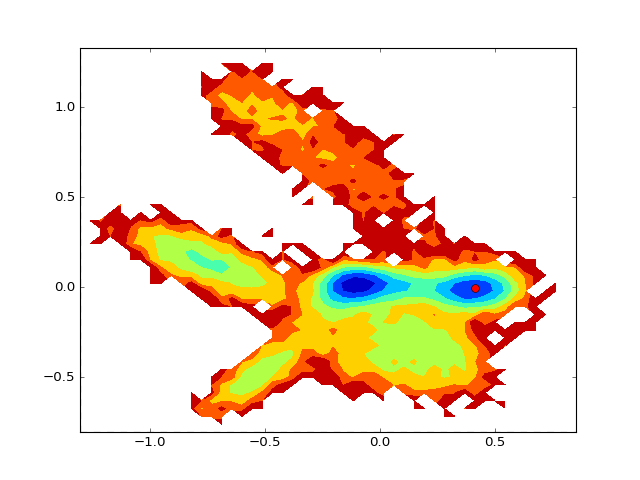

/home/mi/gph82/SOURCE_gph82/python/projection_explorer/projX/api.py:179: RuntimeWarning: divide by zero encountered in log
  _plt.contourf(-_np.log(h).T, extent=irange)


In [13]:
ax, fig, iwd, sample, geom = projX.visualize_FES(trajfile, top, 
                                                 Z,
                                                 #'data/Z.npy', 
                                          )
iwd

<IPython.core.display.Javascript object>


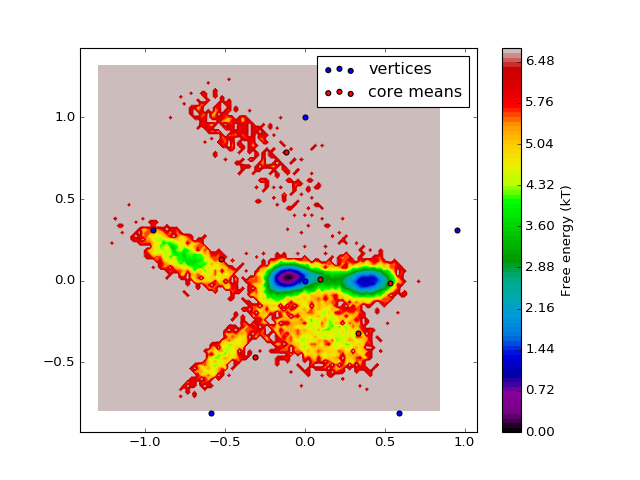

In [14]:
plt.figure()
pyemma.plots.plot_free_energy(Z[:, 0], Z[:, 1])
V = (vertices-o).dot(P)
plt.scatter(V[:, 0], V[:, 1], label='vertices')
M = (means-o).dot(P)
plt.scatter(M[:, 0], M[:, 1], c='r', label='core means')
plt.legend()

In [15]:
dtrajs = simplex.core_assignments(Y, vertices, f=0.5)

In [16]:
C, s = simplex.milestoning_count_matrix(dtrajs, lag=5, return_scrapped=True)
s, C

(0, array([[20834,    16,   671,   115,    64,    70],
        [   24,  1013,     4,     5,     0,     0],
        [  635,    10, 11493,    86,    20,     5],
        [  121,    33,    96,  2456,     0,    42],
        [   68,     0,    19,     0,   921,     0],
        [   43,     0,     2,    29,     1,  2349]]))

In [17]:
import msmtools
msmtools.estimation.largest_connected_set(C)

array([0, 1, 2, 3, 4, 5])